<a href="https://colab.research.google.com/github/Conversalfall/AI/blob/main/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

Importing the Dataset


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1pvfyHtcYZikrw_yBRAFzh6JaY9q0OzrT

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1pvfyHtcYZikrw_yBRAFzh6JaY9q0OzrT
To: /content/data.csv
100% 527k/527k [00:00<00:00, 123MB/s]


Loading and reading and also displaying the dataset


In [ ]:
# Load the dataset from the specified file path
df = pd.read_csv('/content/data.csv')

# Display the first few rows of the DataFrame
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


(optional) Displaying the information of the dataframe

In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

removing any rows that contain any null values

In [ ]:
df.isnull().sum()
# Remove rows with any null values
# df.dropna(inplace=True)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

dropping the (country,statezip,street) columns because it does not affect the dataset

In [ ]:
# Dropping specified columns from the DataFrame
columns_to_drop = ['country', 'statezip', 'street']
df = df.drop(columns=columns_to_drop)


specifying a number to each column so we can work with it easier

In [ ]:
# List of specified categorical columns
dummy = ['city']
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)

columns_to_drop = ['city']
df = df.drop(columns=columns_to_drop)
# Display the first few rows of the modified DataFrame
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


### 5. Correlation Matrix

creating the correlation matrix

In [ ]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df.corr()['price'].sort_values(ascending=False)
correlation_matrix

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

plotting the correlation matrix using a heatmap

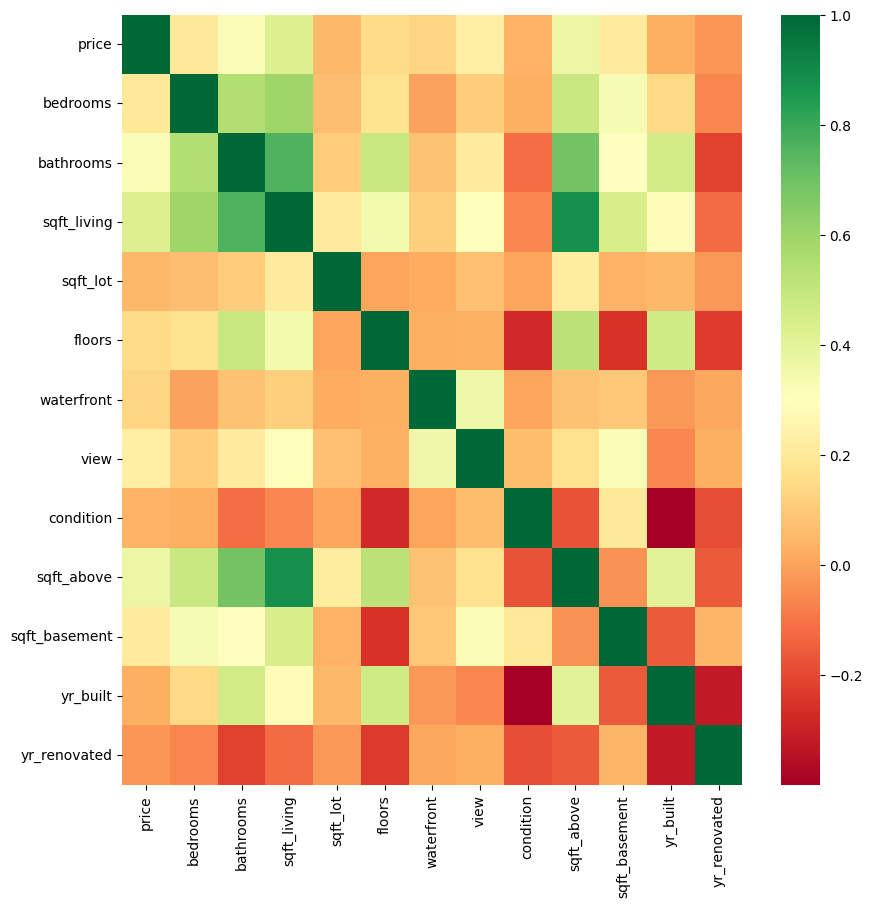

In [ ]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.show()

first part: selecting the columns that contain numerical data types

In [ ]:
# Select columns with numerical data types
num = df.select_dtypes(exclude=['object']).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

plotting the correlation matrix of the numerical data type columns using a heatmap

<Axes: >

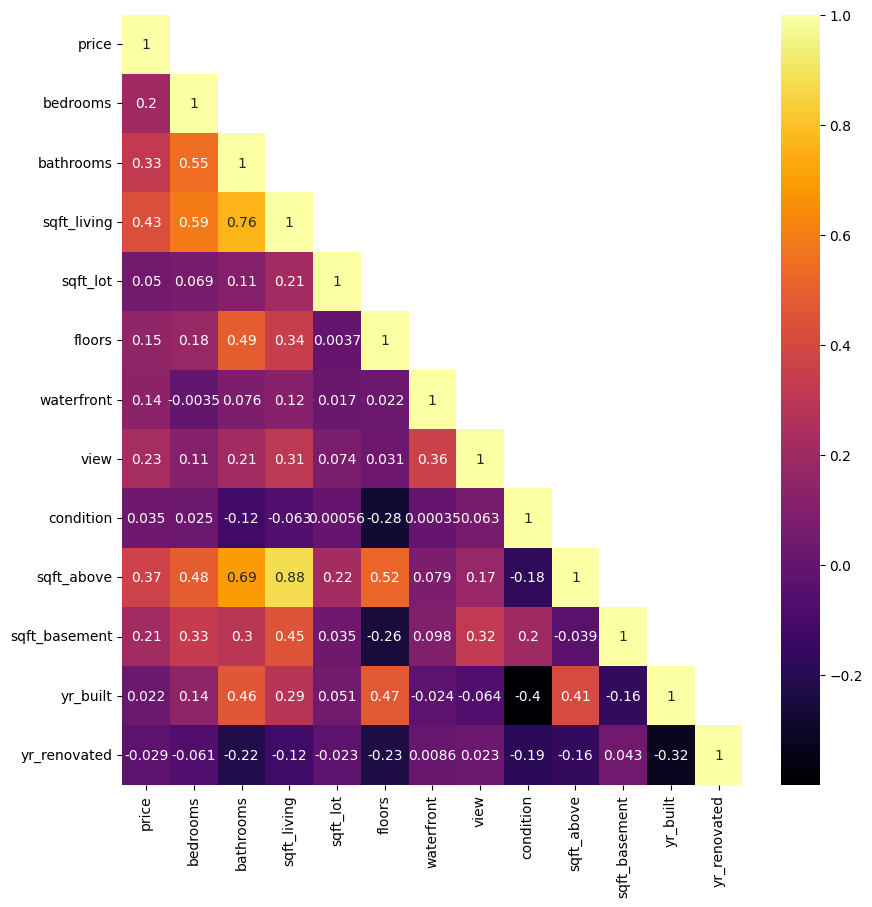

In [ ]:
# Create a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno', mask=np.triu(df[num].corr(), k=1))

### Plot Distribution

using a plot to visualize the distribution of the area vs price

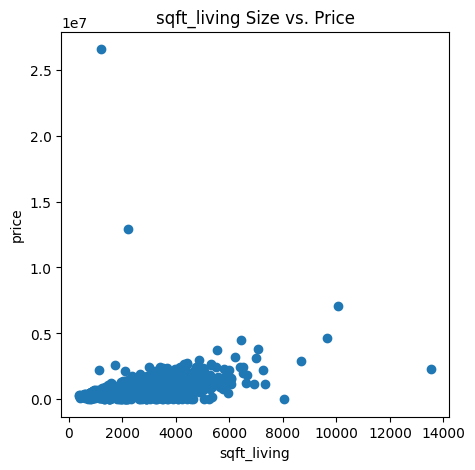

In [ ]:
# Create a scatter plot of enginesize against price
plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=df)
plt.xlabel('sqft_living')
plt.title('sqft_living Size vs. Price')
plt.ylabel('price')
plt.show()

### Distribution of Numeric Variables

using 2 plots, one for price and one for area interval in the numerical variable form

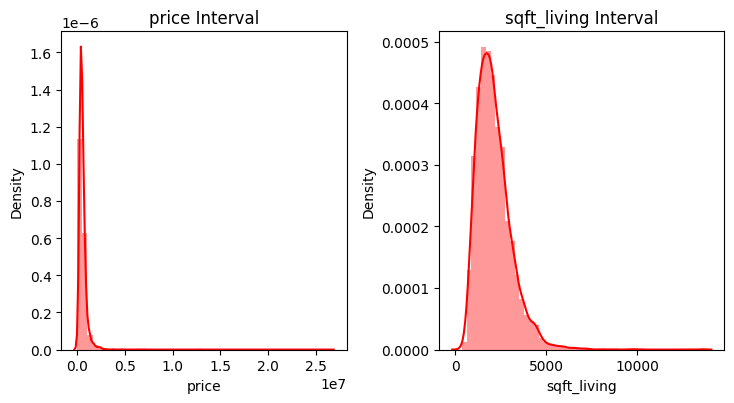

In [ ]:
# Define the columns to visualize (adjust this list as needed)
numerical_columns = [
    'price','sqft_living'
]

# Create a 4x4 grid of subplots for various numerical variables
plt.figure(figsize=(15, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.distplot(df[column], color="red").set_title(f'{column} Interval')

plt.tight_layout()
plt.show()

### Split and Normalize Data

omitting date and adding two columns of year and month to the dataset

In [ ]:

# Assuming 'date' is the name of your date column in the DataFrame 'df'
# Convert 'date' column to pandas datetime format
df['date'] = pd.to_datetime(df['date'])

# Extracting year and month into separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop the 'date' column from the DataFrame
df = df.drop(columns=['date'])

# Displaying the updated DataFrame with new 'year' and 'month' columns
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,2014,5
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2014,5
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2014,5
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,2014,5
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,2014,7
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,2014,7
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,2014,7
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2014,7


Performing Train and test with a ratio of 80 to 20

In [ ]:
# Separate input (X) and output (Y) data
Y = df["price"]  # Output data
X = df.drop(["price"], axis=1)  # Input data

In [ ]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

Using a minmaxScaler for the trained and tested data

In [ ]:
# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (3680, 14)
X Test Scaler :  (920, 14)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


In [ ]:
# Find the maximum value in y_train data
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

# Loop through the elements of y_train
for i in range(x_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

In [ ]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [ ]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

## Multi-Layer Perceptron

Modeling a MLP to our dataset and plotting the results

### MLP with 2 hidden layer

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                750       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2311 (9.03 KB)
Trainable params: 2311 (9.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit model_2

Using adam optimizer and mse loss fcn for this model

In [ ]:
model_2.compile(optimizer='adam', loss='mse')
history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100 ,batch_size=10, verbose=0)

In [ ]:
#Evaluate the model
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 2ms/step - loss: 9.1230e-05


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)

rscore_2

29/29 [==============================] - 0s 2ms/step


0.45940611130679265

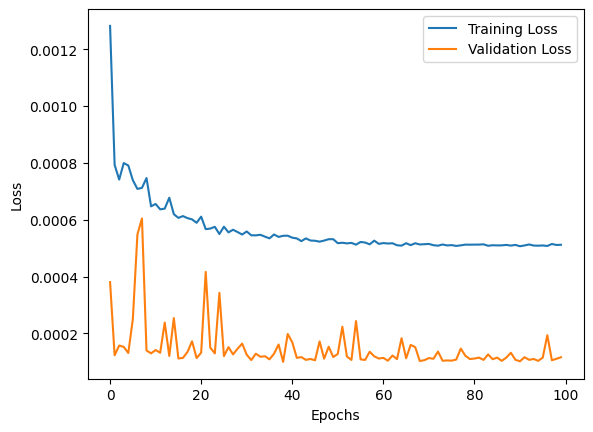

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Different losses and optimizers for model_2

### SGD + MSE

Modeling the dataset again

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                750       
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2311 (9.03 KB)
Trainable params: 2311 (9.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Using sgd optimizer and mse loss fcn

In [ ]:
# Compile model with stochastic gradient descent optimizer and mean square error loss
model_2.compile(optimizer = 'sgd',loss = 'mse')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 3ms/step - loss: 8.4599e-05


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

29/29 [==============================] - 0s 2ms/step


0.49869454948170855

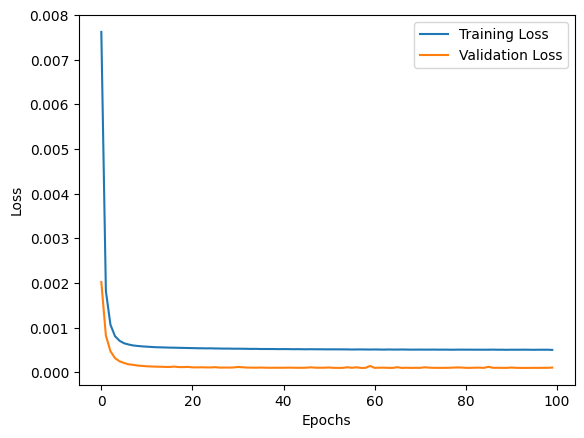

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

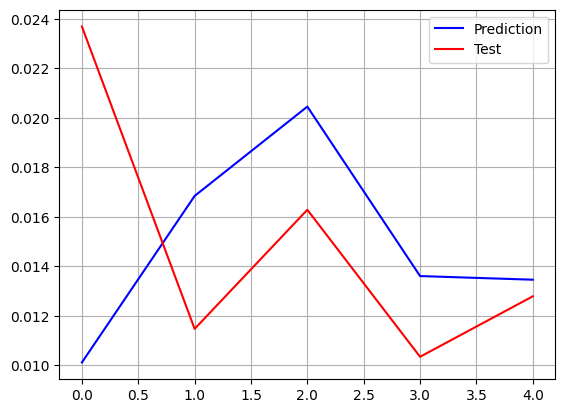

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

## Prediction

In [ ]:
# Calculate the range of the output values
a = maximum - minimum

# Convert predicted values back to the original scale
y_pred_true = a * (y_pred_2)
y_pred_true_1 = y_pred_true + minimum

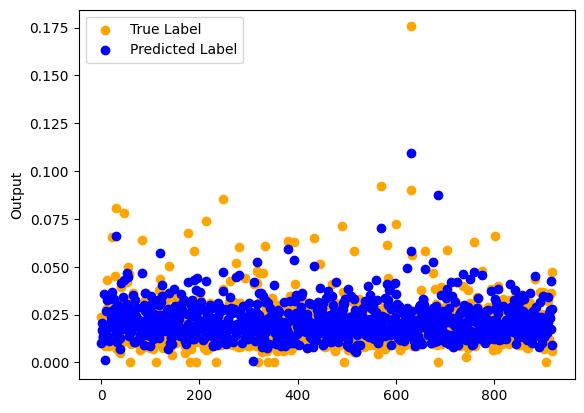

In [ ]:
# Create a scatter plot for true and predicted outputs
plt.scatter(range(len(y_test)), y_test, color="orange")  # True labels in orange
plt.scatter(range(len(y_test)), y_pred_2, color="blue")  # Predicted labels in blue

plt.legend(['True Label', 'Predicted Label'])
plt.ylabel("Output")
plt.show()

In [ ]:
# Obtaining predictions from your model
predicted_values = y_pred_2.squeeze()  # Squeeze predictions if necessary

# Randomly selecting 5 indices to showcase
num_samples_to_show = 5
max_index = len(y_pred_2)
indices_to_show = random.sample(range(max_index), num_samples_to_show)

for idx in indices_to_show:
    # Display predicted and actual values
    print(f"Sample {idx + 1}: Predicted Value - {predicted_values[idx]}, Actual Value - {y_test[idx]}")

Sample 861: Predicted Value - 0.013292458839714527, Actual Value - [0.01918014]
Sample 449: Predicted Value - 0.02359829470515251, Actual Value - [0.02200075]
Sample 550: Predicted Value - 0.020431991666555405, Actual Value - [0.01336217]
Sample 530: Predicted Value - 0.016982700675725937, Actual Value - [0.00996615]
Sample 275: Predicted Value - 0.04479226469993591, Actual Value - [0.05204964]
